<a href="https://colab.research.google.com/github/josephxlp/PyTorch100Days/blob/main/W2DAY8_Visualizing_Gradients_using_Hooks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

W2DAY8:Visualizing Gradients using Hooks

Description:

  - we introduce concepts of forward and backward hooks in PyTorch to visualize and inspect gradients flowing through layers during training.
  - It can a helpful tool for debugging and interpretability.

Goal:
Use backward hooks to capture and print gradients of intermediate layers in a neural network.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [ ]:
# Generate simple synthetic data
X = torch.randn(100, 3)  # 10 samples, 3 features
Y = torch.randn(100, 1)  # 10 targets

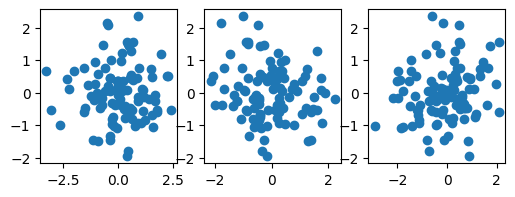

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(6,2))

ax[0].scatter(X[:, 0].numpy(), Y.numpy())
ax[1].scatter(X[:, 1].numpy(), Y.numpy())
ax[2].scatter(X[:, 2].numpy(), Y.numpy())
plt.show()



In [ ]:
class SmallNet(nn.Module):
    def __init__(self):
        super(SmallNet, self).__init__()
        self.fc1 = nn.Linear(3, 5)
        self.fc2 = nn.Linear(5, 1)


    def forward(self, x):
      x = F.relu(self.fc1(x))
      return self.fc2(x)

In [ ]:
model = SmallNet()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)


In [ ]:
def print_grad_hook(module, gradi, grado):
    print(f"\n--- Gradient for {module.__class__.__name__} ---")
    print("Grad Input:", gradi)
    print("Grad Output:", grado)

In [ ]:
# Register a backward hook on the first layer
hook = model.fc1.register_backward_hook(print_grad_hook)
# Forward pass
output = model(X)
loss = criterion(output, Y)
# Backward pass (this triggers the hook)
optimizer.zero_grad()
loss.backward()


--- Gradient for Linear ---
Grad Input: (tensor([-0.0059,  0.0025, -0.0293,  0.1724, -0.0058]), None, tensor([[-0.0137,  0.0003, -0.0147,  0.1082,  0.0034],
        [ 0.0109, -0.0021,  0.0304, -0.1819,  0.0069],
        [-0.0113,  0.0019, -0.0158,  0.0970,  0.0017]]))
Grad Output: (tensor([[ 0.0000e+00,  0.0000e+00,  6.0150e-06, -3.7790e-05,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00, -2.2956e-03,  1.4423e-02,  0.0000e+00],
        [ 0.0000e+00, -4.1453e-04,  0.0000e+00,  0.0000e+00,  1.8970e-03],
        [ 0.0000e+00,  1.6718e-04, -6.9722e-04,  4.3805e-03, -7.6509e-04],
        [ 0.0000e+00,  0.0000e+00, -2.3541e-03,  1.4790e-02,  0.0000e+00],
        [ 6.5176e-04,  0.0000e+00,  0.0000e+00,  0.0000e+00,  6.0430e-04],
        [-3.8353e-04,  0.0000e+00, -3.2406e-04,  2.0360e-03,  0.0000e+00],
        [ 0.0000e+00,  1.6242e-04, -6.7737e-04,  4.2557e-03,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00, -1.3770e-04,  8.6511e-04,  0.0000e+00],
        [ 2.2904e-04, -4.6405e-05,  0.000

In [ ]:
optimizer.step()

# Remove hook after inspection
hook.remove()

This can help you inspect how gradients propagate through layers and whether training behaves as expected.